In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas.util.testing as tm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import sys

sys.path.append('./../../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src.pca

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.pca import PCA_from_sklearn

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Clasificador de árbol de decisión 

In [2]:
#Se cargan los datos iniciales para obtener la target que es FoodGroup
df = pd.read_csv('../../data/nndb_flat.csv', encoding = "L1") 

In [3]:
df_1 = pd.DataFrame(df.FoodGroup)

In [4]:
df_1.FoodGroup.value_counts(dropna=False)

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

In [5]:
##Se codifica la variable FoodGroup usando LabelEncoder de sklearn
labelencoder = LabelEncoder()
df_1['FoodGroup'] = labelencoder.fit_transform(df_1.FoodGroup)

In [6]:
df_1.FoodGroup.value_counts(dropna=False)

3     946
24    828
2     797
21    452
12    438
17    390
13    389
8     371
5     363
1     362
23    347
11    346
16    343
4     315
10    267
7     264
19    244
9     219
6     183
20    171
0     165
15    133
14    113
18    108
22     64
Name: FoodGroup, dtype: int64

In [7]:
##Se cargan los 7 componentes principales que se usaran en este análisis
componentesprincipales_analisis_post = pd.read_csv('../../results/data_results/componentesprincipales_analisis_post.csv') 

In [8]:
classifier = DecisionTreeClassifier(random_state=0)

In [9]:
###Se divide la muestra en entrenamiento y prueba, en 60% y 40%, respectivamente.
X_train, X_test, y_train, y_test = train_test_split(componentesprincipales_analisis_post, df_1.FoodGroup, test_size=0.4, random_state=0)

In [10]:
###Se entrena el modelo
classifier = classifier.fit(X_train, y_train)

In [11]:
y_pred = pd.DataFrame(classifier.predict(X_test))

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6244199535962877


In [13]:
np.mean(cross_val_score(classifier, X_train, y_train, cv=5)) 

0.6102522360606615

In [14]:
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))

Precision: 0.5673195381729577


In [15]:
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

Recall: 0.5557755290618943


In [16]:
clf_matrix=metrics.confusion_matrix(y_test,y_pred)

In [17]:
pd.DataFrame(clf_matrix)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,7,2,2,6,5,1,1,1,3,1,...,2,0,1,0,4,2,2,1,0,3
1,2,85,3,0,1,1,0,1,3,0,...,1,0,0,0,1,1,12,0,1,8
2,2,1,230,0,0,6,9,3,6,0,...,3,0,0,2,0,18,5,0,11,3
3,1,0,0,307,2,0,0,0,1,0,...,0,5,11,3,3,0,0,0,0,0
4,3,5,2,0,75,1,0,2,2,4,...,4,0,0,0,0,0,12,1,5,3
5,1,8,5,0,3,112,1,0,0,0,...,0,0,0,0,0,8,1,1,0,4
6,6,0,17,0,1,9,32,0,0,0,...,0,0,0,0,0,1,4,1,0,0
7,3,2,4,1,4,0,0,72,6,4,...,0,0,0,2,3,0,4,0,4,0
8,1,0,8,0,0,0,1,7,91,3,...,0,2,3,10,1,0,4,0,5,2
9,1,0,0,2,3,0,0,0,0,61,...,1,0,0,2,0,0,1,0,2,0


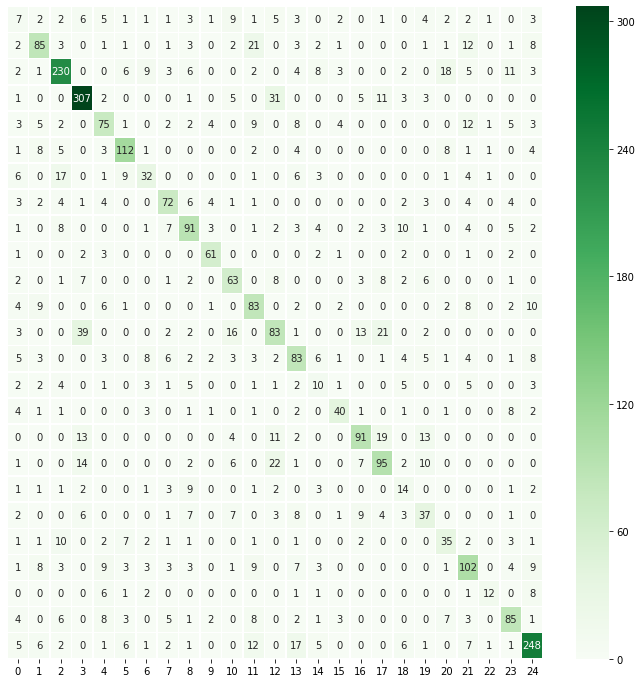

In [18]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(pd.DataFrame(clf_matrix), annot=True, fmt="g", linewidths=.5, xticklabels=1, cmap="Greens", yticklabels=False, cbar=True)

### K - Means

- Se utiliza este algoritmo para el análisis de conglomerados. 
- Se eligen los dos principales componentes

In [19]:
componentesprincipales_dos = componentesprincipales_analisis_post.loc[:, ['principal_component_1', 'principal_component_2']]

In [20]:
componentesprincipales_dos

,principal_component_1,principal_component_2
0,-1.121776,-1.182251
1,-1.114687,-1.184173
2,-0.994919,-1.573580
3,0.235910,0.566070
4,0.300785,0.537659
...,...,...
8613,0.558544,1.975874
8614,-0.762069,1.320084
8615,-0.767671,-3.267656
8616,0.355897,0.678435


Por lo que, para el primer componente principal se asocian más la vitamina Riboflavin o vitamina B2, Niacin o vitamina B3 y la vitamina B6. El porcentaje de varianza explicada de este componente es de 23.69%. Mientras que, para el segundo componente principal se asocian los carbohidratos, el azúcar y la vitamina B12. El porcentaje de varianza explicada de este segundo componente principal es de 11.38% (ver notebook [PCA_from_sklearn](https://github.com/123972/PCA-nutricion/blob/master/notebooks/Programacion/PCA_from_sklearn.ipynb)).

In [21]:
### Se cargan las funciones
import sklearn as sk
from sklearn import preprocessing
from sklearn.cluster import KMeans

- Gráfica que muestra los dos componentes principales.

Text(0, 0.5, 'Componente 2')

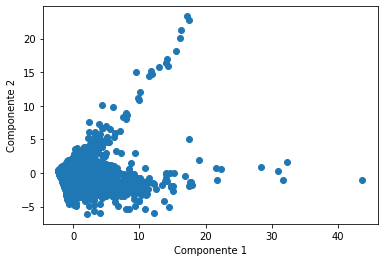

In [22]:
plt.scatter(data=componentesprincipales_dos, x='principal_component_1', y='principal_component_2')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

- Se obtiene el número de clusters óptimos a partir del punto de corte de la siguiente gráfica, el método que se uso fue el de Elbow. Sin embargo este proceso se tarda mucho y además nos arroja dos puntos de corte (2 y 5), por lo que se decidió paralelizar usando Dask.

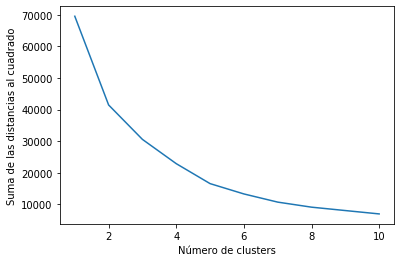

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(componentesprincipales_dos)
    wcss.append(kmeans.inertia_)

# Gráfica de la suma de las distancias al cuadrado
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.show()

#### Cómputo en paralelo usando Dask

In [24]:
### Se cargan las librerías
from dask.distributed import Client, progress
import dask_ml.cluster

In [25]:
client = Client()
client

C:\Users\Elizabeth\Anaconda3\lib\site-packages\distributed\dashboard\core.py:72: UserWarning: 
Failed to start diagnostics server on port 8787. [WinError 10048] Solo se permite un uso de cada dirección de socket (protocolo/dirección de red/puerto)
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:59500 Dashboard: http://127.0.0.1:59503/status,Cluster Workers: 4 Cores: 12 Memory: 17.02 GB


- Al dar click en el dashboard de arriba se muestra la página de status mediante bokeh, en el puerto 8787. A continuación se presenta el apartado de workers:

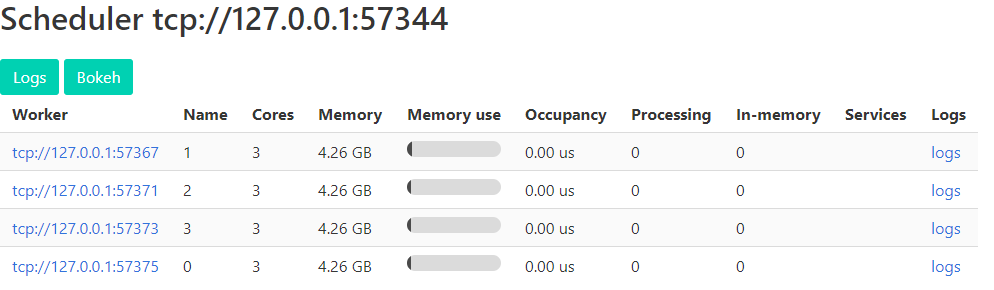

In [30]:
from IPython.display import Image, display
display(Image(filename='../../docs/img/dask_workers.png', embed=True))

- Se obtiene el número de cluster óptimos paralelizando mediante Dask.

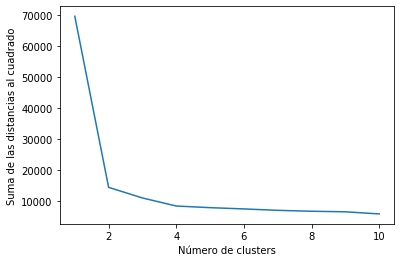

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = dask_ml.cluster.KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(componentesprincipales_dos)
    wcss.append(kmeans.inertia_)

# Gráfica de la suma de las distancias al cuadrado
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.show()

- En la gráfica se observa que el número de clusters óptimos es de 2, aunque se puede ver que también el 4 tiene un poco de inflexión, así que se usaremos K- Means para dos clusters y también se paraleliza. 

In [28]:
kmeans = dask_ml.cluster.KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
k_means = kmeans.fit(componentesprincipales_dos)
centers = kmeans.cluster_centers_ ###centroides de los clusters
labels = kmeans.labels_

Text(0, 0.5, 'Componente 2 \n (p138, p152, p139)')

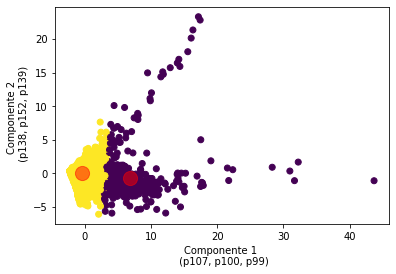

In [29]:
plt.scatter(data=componentesprincipales_dos, x='principal_component_1', y='principal_component_2', c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Componente 1 \n (p107, p100, p99)')
plt.ylabel('Componente 2 \n (p138, p152, p139)')

##### Referencias:

- Palacios M. Erick, Notas de MNO 2020, [Cómputo en paralelo - Dask](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/II.computo_paralelo/2.2.Python_dask.ipynb)
- Tipología_manejo_agrícola por [Irene Ramos](https://github.com/iramosp/tesis-paisajes/blob/master/Tipologia_manejo_agricola.ipynb)